# Parte que o Lucio fez

### Nesse notebook vamos descrever em detalhes todas etapas para uma classificação primária dos exames de pacientes do Hospital Israelita Albert Einstein / SP 

Nesse workshop vamos utilizar modelos de aprendizagem de máquina (Machine Learning - ML) para prever se um paciente tem ou não a COVID-19. Para isso analisaremos apenas exames laboratoriais que não detectam a presença de anti corpos do vírus causador da doença. Nesse estudo vamos analisar dados normalizados e anonimizados de pacientes do hospital Albert Einstein/SP.

Nessa primeira etapa vamos focar na organização dos dados disponibilizados pelo hostiptal no site:
https://www.kaggle.com/einsteindata4u/covid19

Ao final dessa primeira seção serão passadas diretrizes para que vocês possam escrever um código, para determinar se um paciente terá a COVID-19.

Na quinta feira dia 15/10, iremos ter um novo encontro para discutir as classificações feitas e mostrar maneiras de explicar os resultados obtidos.

1. Nesse notebook iremos seguir as etapas:

    1. Importar algumas bibliotecas necessárias para ler e manipular os dados disponibilizados;
    2. Ler os dados;
    3. Entender e organizar os dados disponíveis.

In [1]:
# Uma pergunta para todos, para você o que é uma biblioteca?

#incialmente vamos importar o pandas para a leitura e análise dos dados e numpy para fazer algumas operações
import pandas as pd
import numpy as np

In [2]:
# biblioteca para fazer plot de gráficos
import matplotlib.pyplot as plt

In [3]:
#ler os dados
df = pd.read_excel('dataset.xlsx')

#imprimir as primeiras linhas do DataFrame
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Para nosso objetivo a identificação do paciente não importa, então vamos deletar essa coluna
del df['Patient ID']

In [5]:
# vamos colocar todos os nomes das colunas em letras minúsculas
df = df.rename(columns=str.lower)
df.head()

,patient age quantile,sars-cov-2 exam result,"patient addmited to regular ward (1=yes, 0=no)","patient addmited to semi-intensive unit (1=yes, 0=no)","patient addmited to intensive care unit (1=yes, 0=no)",hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,lymphocytes,mean corpuscular hemoglobin concentration (mchc),leukocytes,basophils,mean corpuscular hemoglobin (mch),eosinophils,mean corpuscular volume (mcv),monocytes,red blood cell distribution width (rdw),serum glucose,respiratory syncytial virus,influenza a,influenza b,parainfluenza 1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma pneumoniae,coronavirus hku1,parainfluenza 3,chlamydophila pneumoniae,adenovirus,parainfluenza 4,coronavirus229e,coronavirusoc43,inf a h1n1 2009,bordetella pertussis,metapneumovirus,parainfluenza 2,neutrophils,urea,...,urine - esterase,urine - aspect,urine - ph,urine - hemoglobin,urine - bile pigments,urine - ketone bodies,urine - nitrite,urine - density,urine - urobilinogen,urine - protein,urine - sugar,urine - leukocytes,urine - crystals,urine - red blood cells,urine - hyaline cylinders,urine - granular cylinders,urine - yeasts,urine - color,partial thromboplastin time (ptt),relationship (patient/normal),international normalized ratio (inr),lactic dehydrogenase,"prothrombin time (pt), activity",vitamin b12,creatine phosphokinase (cpk),ferritin,arterial lactic acid,lipase dosage,d-dimer,albumin,hb saturation (arterial blood gases),pco2 (arterial blood gas analysis),base excess (arterial blood gas analysis),ph (arterial blood gas analysis),total co2 (arterial blood gas analysis),hco3 (arterial blood gas analysis),po2 (arterial blood gas analysis),arteiral fio2,phosphor,cto2 (arterial blood gas analysis)
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# vamos importar uma biblioteca que vai ajudar a ter uma visão geral do dados 
# https://pypi.org/project/sweetviz/

!pip install sweetviz
import sweetviz as sv

df['urine - ph'].replace('Não Realizado', 0.0000001 ,inplace=True)
df['urine - ph'] = pd.to_numeric(df['urine - ph'], errors='coerce')

advert_report = sv.analyze(df, pairwise_analysis='off')

advert_report.show_html('Advertising.html')

     |████████████████████████████████| 327kB 7.6MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


:FEATURES DONE:                    |█████████████████████| [100%]   00:42  -> (00:00 left)


Report Advertising.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### 1. Para explorar o dataset de maneira mais efetiva possível será criado um novo dataset com as informações desejadas de cada coluna. Este dataframe será criado através da função chamada EDA

1. Exploratory data analysis - EDA
    1. https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae

In [7]:
# Vamos criar uma função customizadas para realizar o EDA
def EDA (df):

    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()

    
    eda_df['Mean'] = np.round(df.mean(), 2);
    eda_df['Median'] = np.round(df.median(), 2);
    
    eda_df['Max'] = df.max()
    eda_df['Min'] = df.min()
    eda_df['STD'] = np.round(df.std(), 2)
    
    eda = pd.DataFrame(eda_df)
    
    colunas = sorted(df.columns.tolist(), reverse=False)
    eda['Amount_Unique'] = list(map(lambda x: len(df[x].unique().tolist()), colunas))

    return eda

In [8]:
#Chamar a função criada acima para gerar o DataFrame
informacao_df = EDA(df)

#imprimir as primeiras linhas
informacao_df.head()

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
adenovirus,4292,0.76,object,1352,NaN,NaN,NaN,NaN,NaN,3
alanine transaminase,5419,0.96,float64,225,0.0,-0.28,7.93066,-0.641951,1.00,63
albumin,5631,1.00,float64,13,-0.0,-0.04,1.96299,-2.29016,1.04,11
alkaline phosphatase,5500,0.97,float64,144,-0.0,-0.36,3.88285,-0.959028,1.00,83
arteiral fio2,5624,1.00,float64,20,0.0,-0.01,2.84186,-1.53293,1.03,10


### 2. Com esse tipo de abordagem é possível representar gráficamente todas as características graficamente

In [9]:
def gerar_graficos (df):
    
    # definir a fonte utilizada nos gráficos
    #plt.rcParams['font.family'] = 'monospace'
    #plt.rcParams['font.monospace'] = 'Roboto Mono'
    
    ax = df["%_NaN"].value_counts(normalize=True).plot(kind="bar", figsize=(20, 10), cmap='YlGnBu_r');
    
    #título dos eixos
    ax.set_xlabel("% de dados faltantes", fontsize=26)
    ax.set_ylabel("% de colunas", fontsize=26)

    #tick labels.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor", fontsize = 20);

    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor", fontsize = 20);
    
    #título do gráfico
    plt.title("Dados Faltantes - COVID19 DataSet", fontsize=28);
    
    return (plt.show())

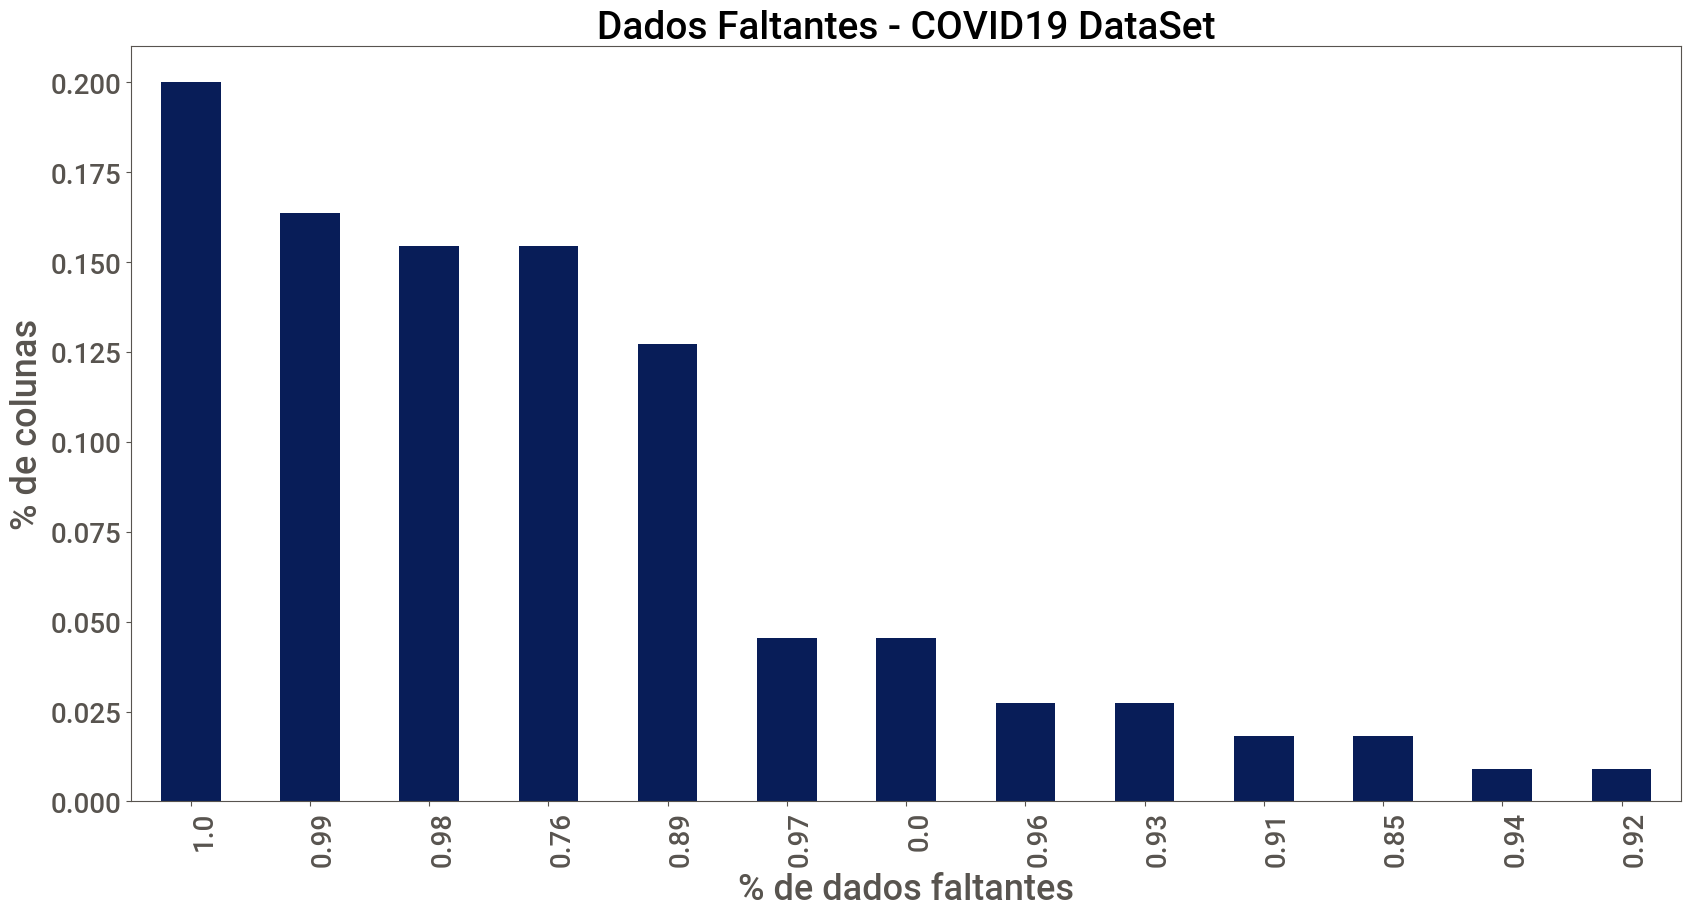

In [10]:
#Vamos começar olhando para as coluna com dados faltantes
gerar_graficos(informacao_df);

In [11]:
#Deletar as colunas com aproximadamente 100% de dados faltantes

#Seleção das colunas
del_colunas = informacao_df.loc[informacao_df["%_NaN"] == 1].index.tolist()

#Deletar as colunas
df1 = df.drop(columns = del_colunas)

In [12]:
# vamos ver quais colunas foram excluídas
del_colunas

['albumin',
 'arteiral fio2',
 'arterial lactic acid',
 'base excess (arterial blood gas analysis)',
 'cto2 (arterial blood gas analysis)',
 'd-dimer',
 'ferritin',
 'fio2 (venous blood gas analysis)',
 'hb saturation (arterial blood gases)',
 'hco3 (arterial blood gas analysis)',
 'lipase dosage',
 'mycoplasma pneumoniae',
 'partial thromboplastin time\xa0(ptt)\xa0',
 'pco2 (arterial blood gas analysis)',
 'ph (arterial blood gas analysis)',
 'phosphor',
 'po2 (arterial blood gas analysis)',
 'prothrombin time (pt), activity',
 'total co2 (arterial blood gas analysis)',
 'urine - nitrite',
 'urine - sugar',
 'vitamin b12']

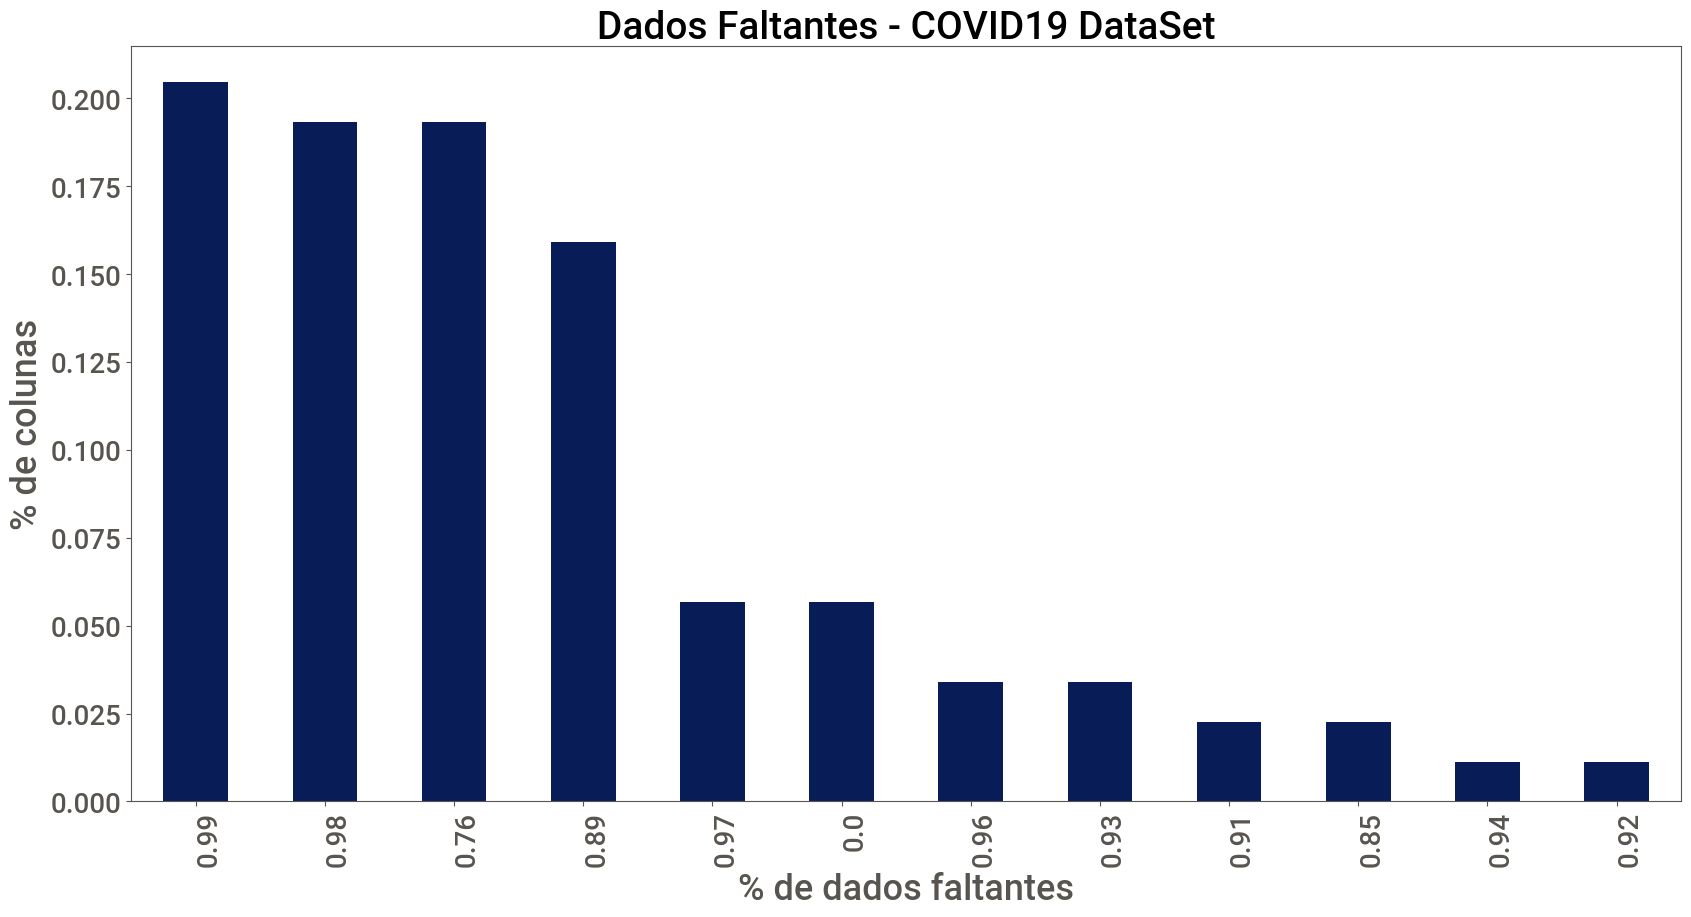

In [13]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df1 = EDA(df1)

gerar_graficos(informacao_df1);

In [14]:
#Vamos Analisar um pouco mais as colunas com muitos dados faltantes (Acima de 90%), que são categóricas
cols = informacao_df1.loc[(informacao_df1["DType"]=="object") \
                             & (informacao_df1["%_NaN"]>=0.9)].index.tolist()

#Vamos imprimir as colunas e seus valores únicos
for col in cols:
    print (col,"  ",df[col].unique().tolist())
    print ("\n")

strepto a    [nan, 'positive', 'negative', 'not_done']


urine - aspect    [nan, 'clear', 'cloudy', 'altered_coloring', 'lightly_cloudy']


urine - bile pigments    [nan, 'absent', 'not_done']


urine - color    [nan, 'light_yellow', 'yellow', 'orange', 'citrus_yellow']


urine - crystals    [nan, 'Ausentes', 'Urato Amorfo --+', 'Oxalato de Cálcio +++', 'Oxalato de Cálcio -++', 'Urato Amorfo +++']


urine - esterase    [nan, 'absent', 'not_done']


urine - granular cylinders    [nan, 'absent']


urine - hemoglobin    [nan, 'absent', 'present', 'not_done']


urine - hyaline cylinders    [nan, 'absent']


urine - ketone bodies    [nan, 'absent', 'not_done']


urine - leukocytes    [nan, '38000', '5942000', '32000', '22000', '<1000', '3000', '16000', '7000', '5300', '1000', '4000', '5000', '10600', '6000', '2500', '2600', '23000', '124000', '8000', '29000', '2000', '624000', '40000', '3310000', '229000', '19000', '28000', '10000', '4600', '77000', '43000']


urine - protein    [nan, 'abse

In [15]:
#Considerando que as colunas acima estão associadas à urina, é bem provável que não seja muito relevante para nosso
#objetivo. Dessa maneira podemos excluir essas colunas sem perda alguma de informação
df2 = df1.drop(columns=cols)

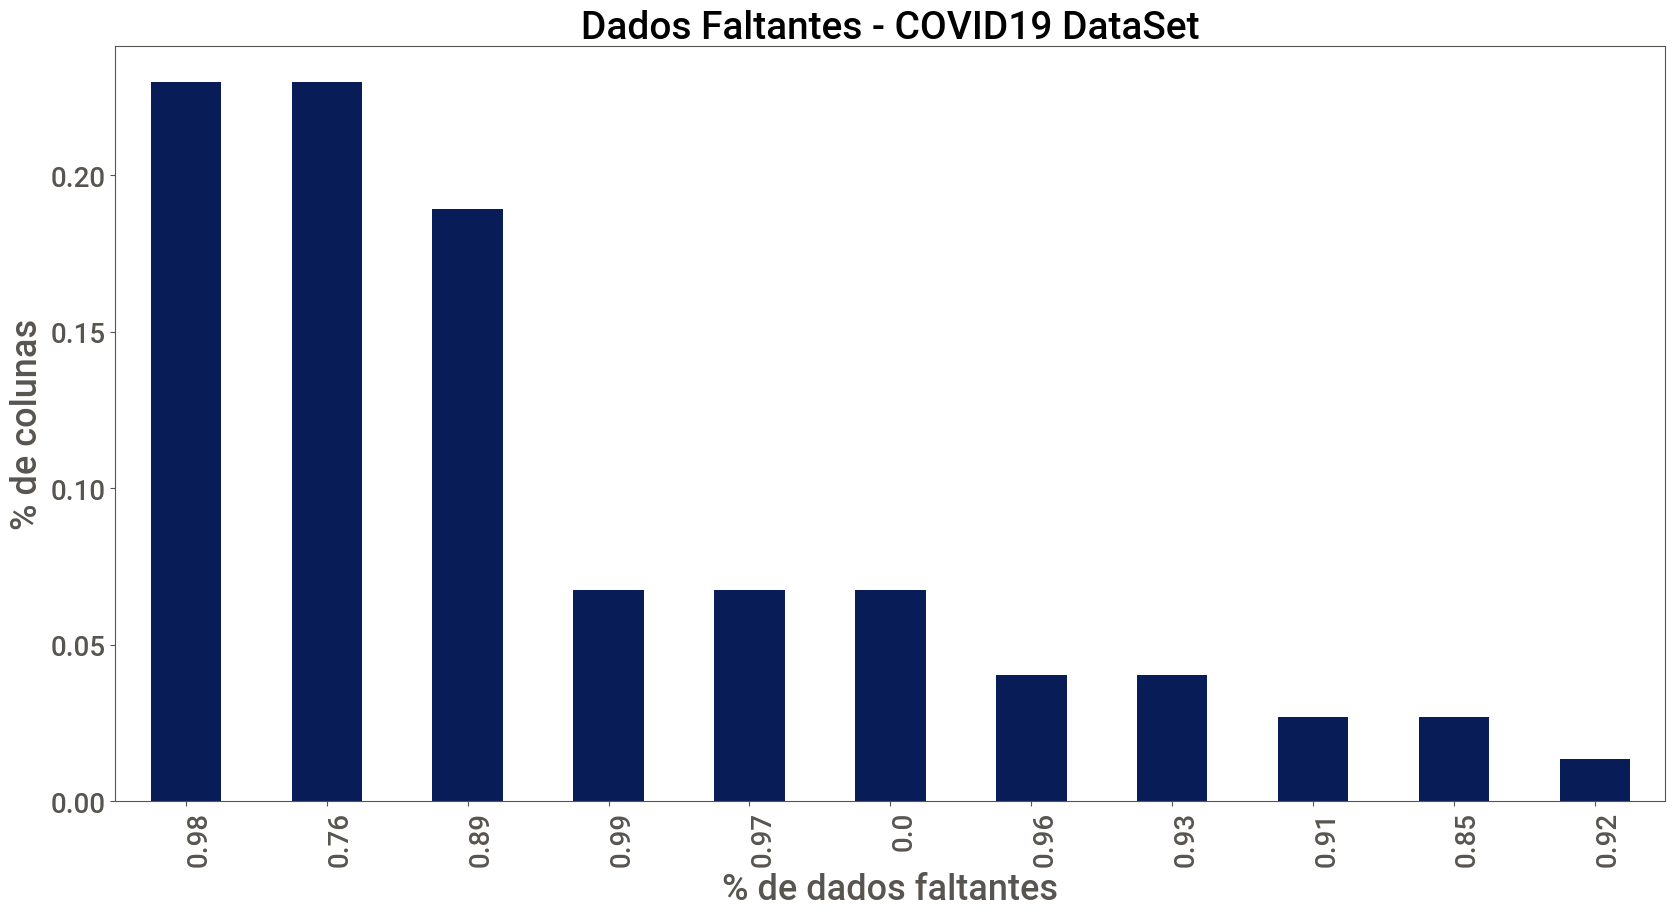

In [16]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df2 = EDA(df2)

gerar_graficos(informacao_df2);

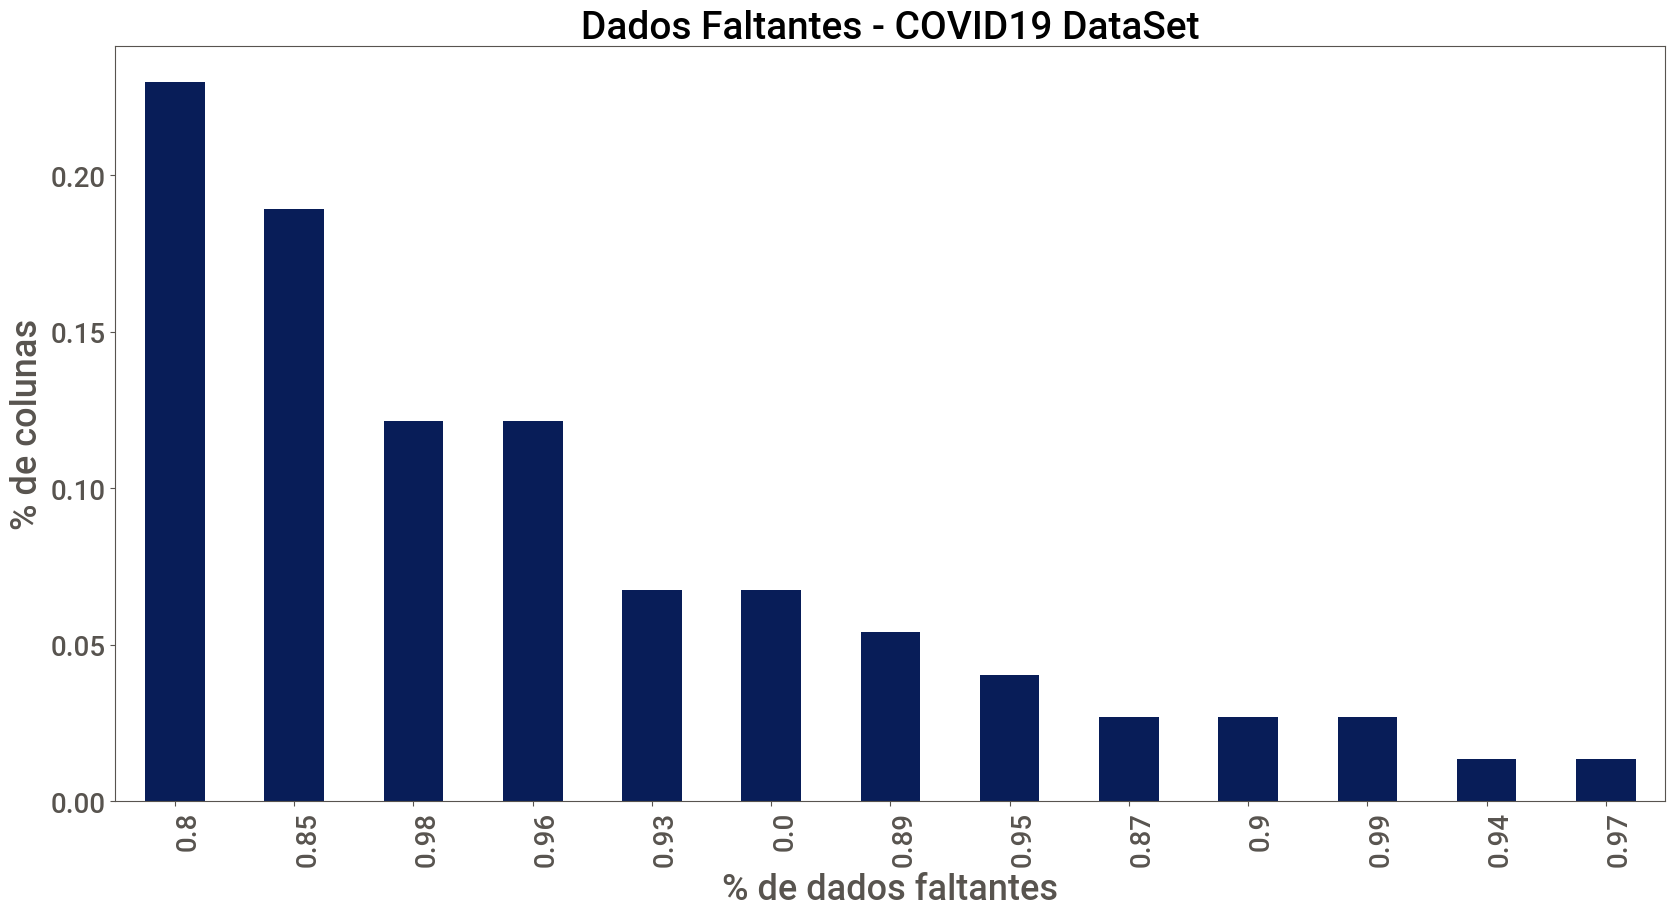

In [17]:
#Para tentarmos entender melhor as colunas, vamos olhar com mais carinho apenas pacientes com COVID
df2_positivos = df2.loc[df2["sars-cov-2 exam result"]=="positive"]

#vamos gerar as informações somente dos pacientes com COVID-19
informacao_df2 = EDA(df2_positivos)

gerar_graficos(informacao_df2);

In [18]:
#Vamos Analisar um pouco mais as colunas quando selecionamos apenas casos positivos para COVID-19
cols = informacao_df2.loc[(informacao_df2["Amount_Unique"]== 2) & \
                          (informacao_df2["DType"]== "object") ].index.tolist()

#cols.remove("sars-cov-2 exam result")

for col in cols:
    if (len(df2_positivos[col].unique().tolist()) ==2):
        print (col,"  ", df2_positivos[col].unique().tolist())
        print ("\n")           

adenovirus    [nan, 'not_detected']


bordetella pertussis    [nan, 'not_detected']


chlamydophila pneumoniae    [nan, 'not_detected']


coronavirus hku1    [nan, 'not_detected']


coronavirusoc43    [nan, 'not_detected']


inf a h1n1 2009    [nan, 'not_detected']


influenza a    [nan, 'not_detected']


influenza a, rapid test    [nan, 'negative']


metapneumovirus    [nan, 'not_detected']


parainfluenza 1    [nan, 'not_detected']


parainfluenza 2    [nan, 'not_detected']


parainfluenza 3    [nan, 'not_detected']


parainfluenza 4    [nan, 'not_detected']


respiratory syncytial virus    [nan, 'not_detected']




### Aqui percebemos que ao selecionarmos apenas casos positivos para COVID-19, há alguma colunas que tem apenas 1 valor, e essas colunas são exames para detectar outros vírus.

In [19]:
#Excluir as colunas acima
df3 = df2.drop(columns=cols) 

In [20]:
df3.shape

(5644, 60)

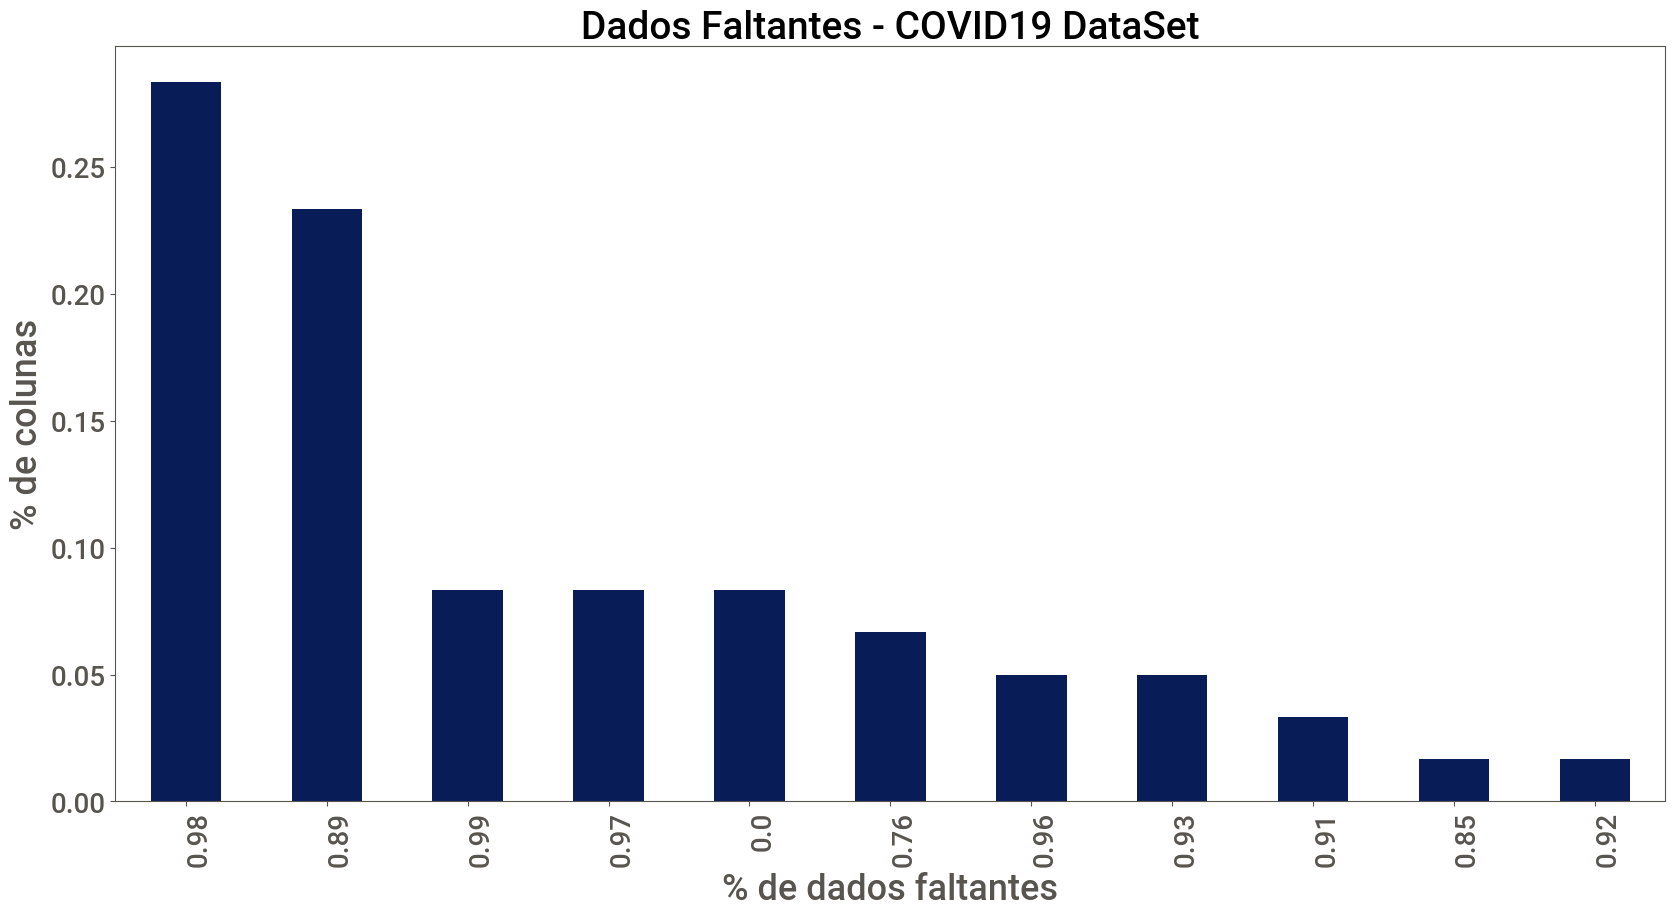

In [21]:
#Recriar o DataFrame com as informações do novo dataset
informacao_df3 = EDA(df3)

gerar_graficos(informacao_df3);

In [22]:
#Após essa limpeza inicial (na qual buscamos entender o significado das colunas excluídas), vamos retirar 
#as colunas do tipo float que apresentam muitos dados faltantes

cols = informacao_df3.loc[(informacao_df3["%_NaN"]> 0.95) & (informacao_df3["DType"] == "float")].index.tolist()

df4 = df3.drop(columns=cols)

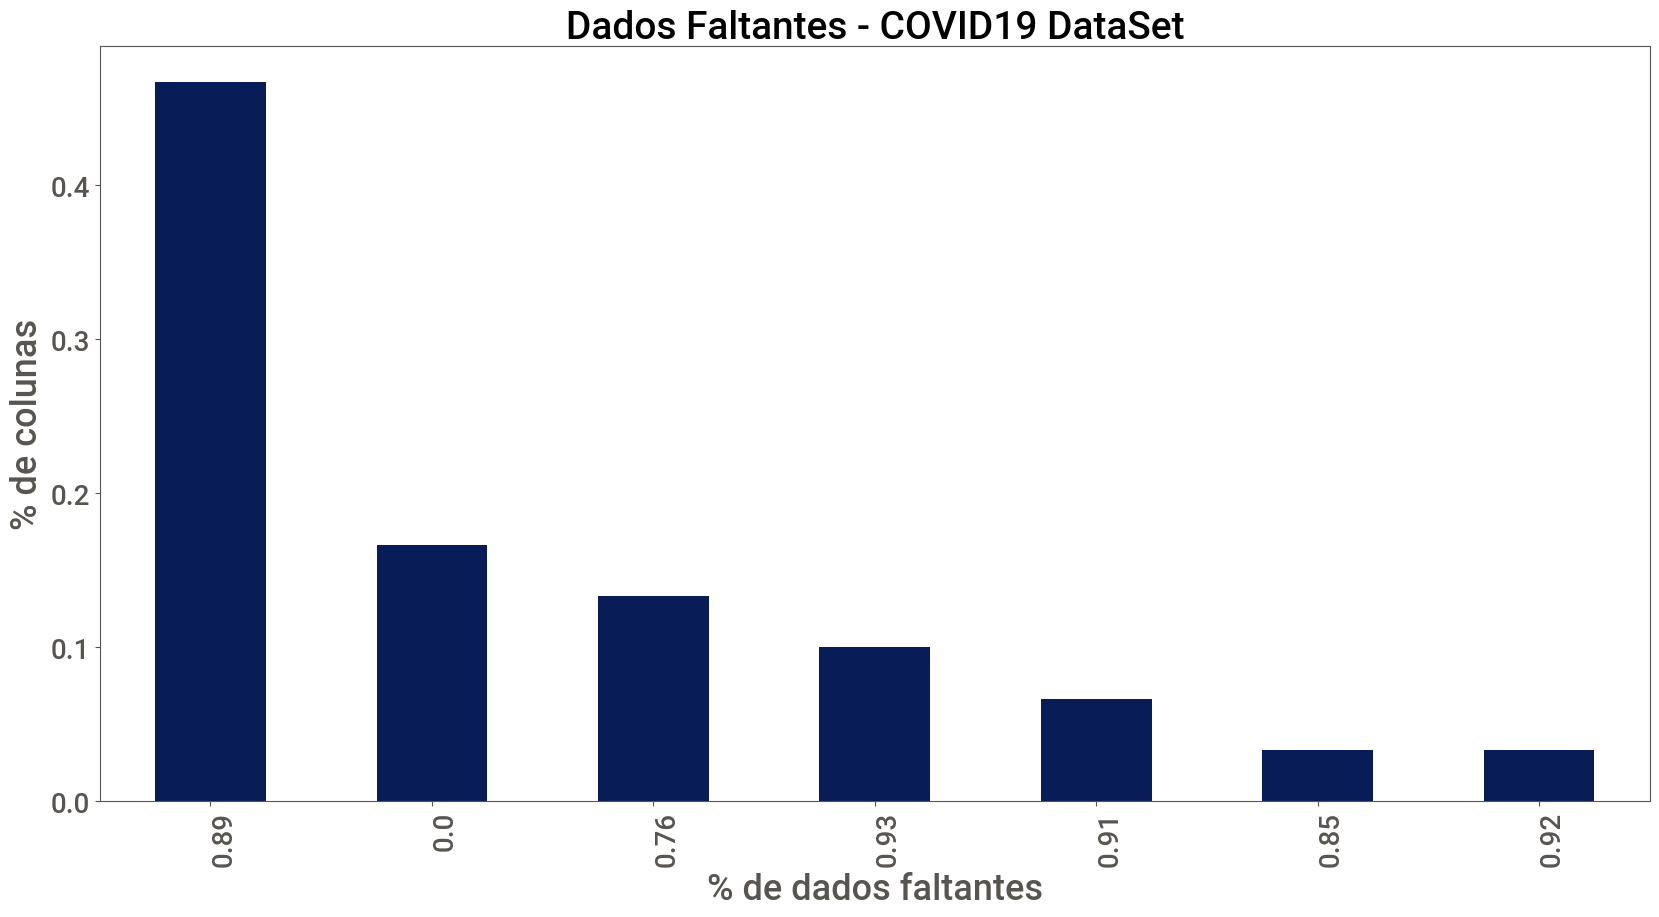

In [23]:
#Vamos conferir como esta o conjunto de dados nesse ponto da limpeza de dados
informacao_df4 = EDA(df4)

gerar_graficos(informacao_df4);

In [24]:
#Vamos excluir linhas que apresentam mas de 50% dos dados faltantes
df5 = df4.dropna(thresh = int(df4.shape[1]*0.5))
df4.shape

(5644, 30)

In [25]:
df5.shape

(602, 30)

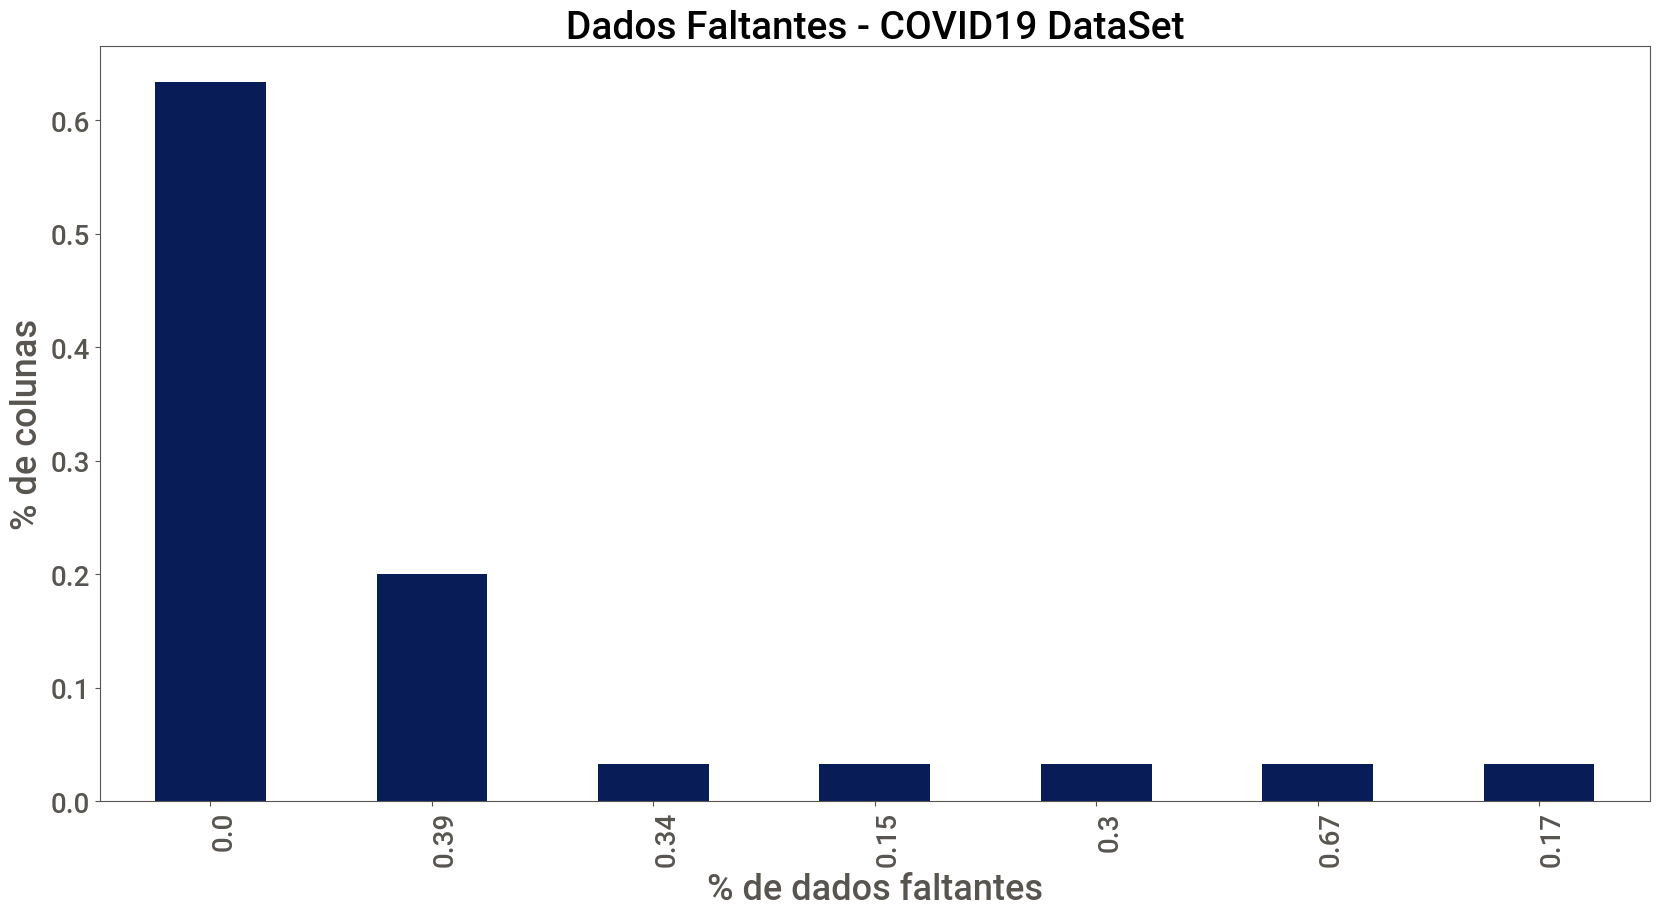

In [26]:
#Atualizando as informações do dataset
informacao_df5 = EDA(df5)

gerar_graficos(informacao_df5);

In [27]:
#Vamos Analisar um pouco mais as colunas com muitos dados faltantes
cols = informacao_df5.loc[(informacao_df5["%_NaN"]==0.67) & (informacao_df5["DType"]!= "int64") ].index.tolist()
cols

['influenza b, rapid test']

In [28]:
#vamos selecionar as colunas que apresentam Influenza no nome
influenza_b_cols = df5.loc[:, df5.columns.str.startswith('influenza')].columns.tolist()
influenza_b_cols

['influenza b', 'influenza b, rapid test']

In [29]:
df6 = df5.drop(columns=influenza_b_cols, axis=1)

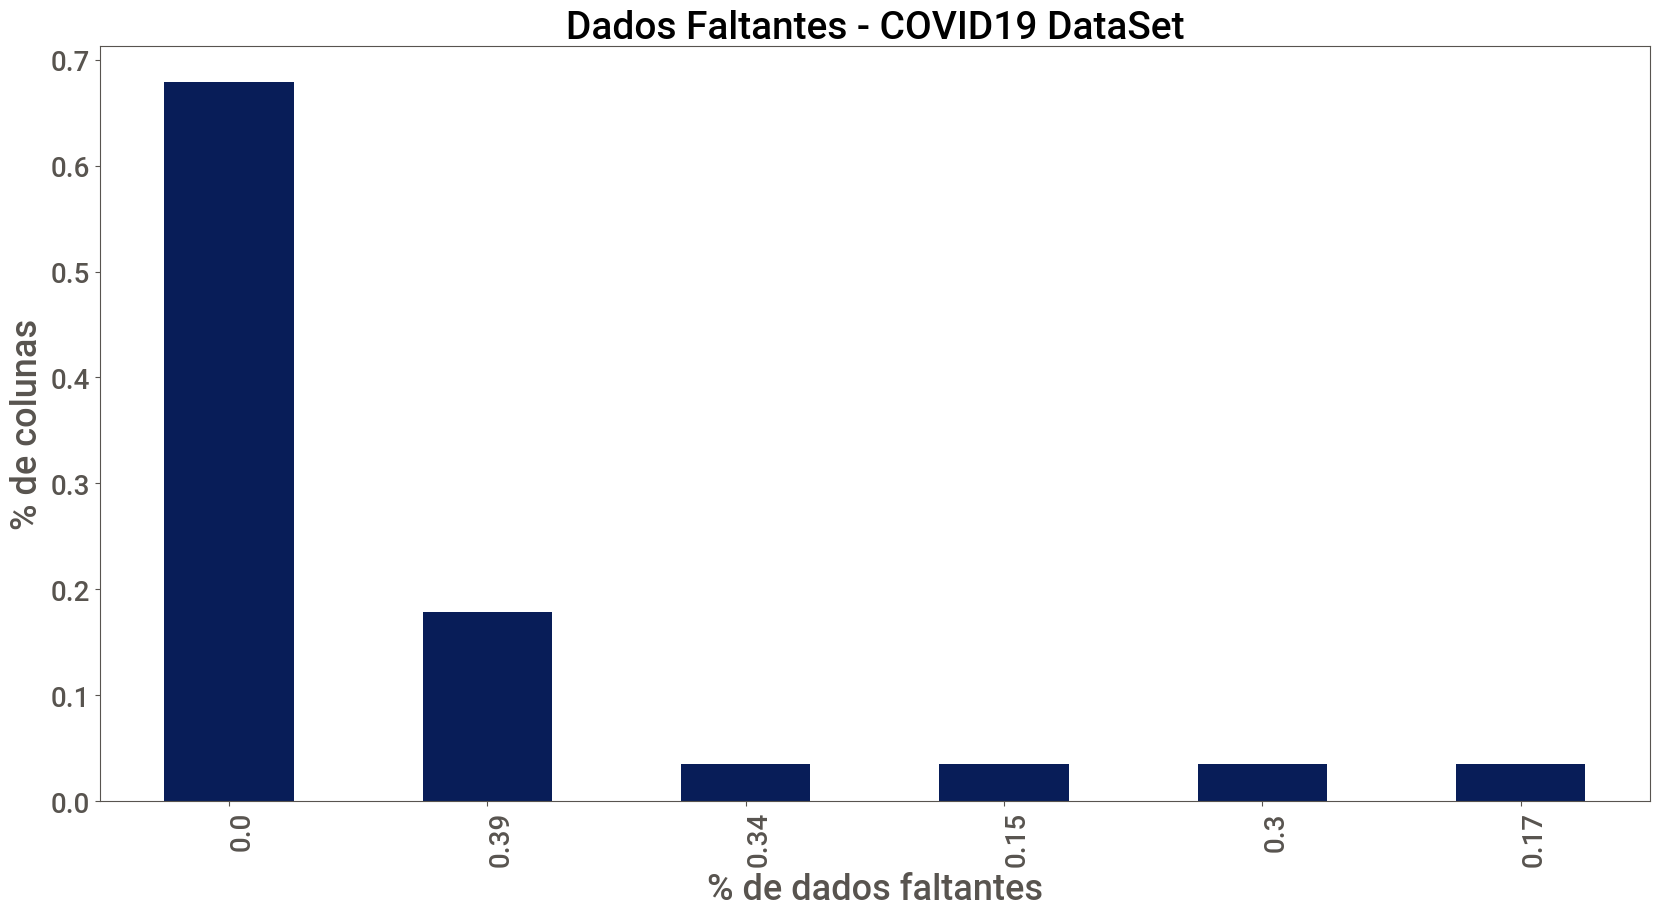

In [30]:
#Atualizar as informações do data set
informacao_df6 = EDA(df6)


gerar_graficos(informacao_df6);

In [31]:
#vamos ver as colunas que apresentam mais dados faltantes
cols = informacao_df6.loc[(informacao_df6["%_NaN"] == 0.39) & (informacao_df6["DType"]== "object") ].index.tolist()
cols

['coronavirus229e', 'coronavirusnl63', 'rhinovirus/enterovirus']

In [32]:
#como são exames relacionadas à outras doenças vamos exclui-las
df7 = df6.drop(columns=cols)

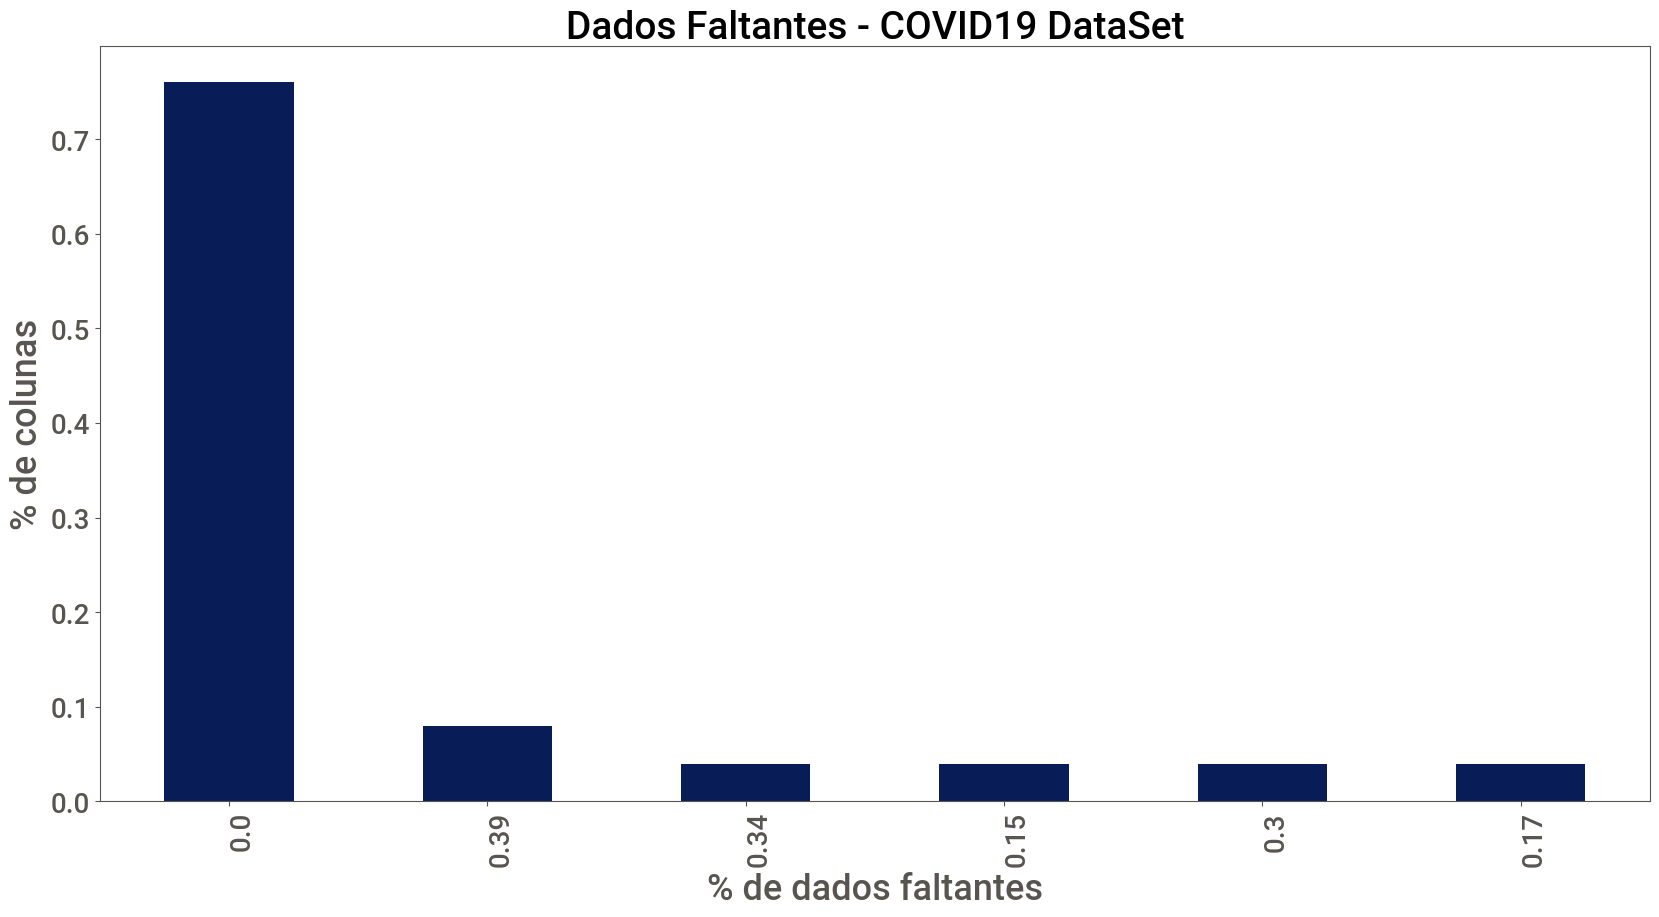

In [33]:
#Atualizar as informações do data set
informacao_df7 = EDA(df7)

gerar_graficos(informacao_df7);

In [34]:
#Vamos ver as informações que contém nas colunas que apresentam mais de 30% de dados faltantes
cols = informacao_df7.loc[(informacao_df7["%_NaN"] >= 0.3)].index.tolist()                                      
cols

['creatinine', 'potassium', 'sodium', 'urea']

In [35]:
#No primeiro instante não parecem informações relevantes para nosso objetivo
df8 = df7.drop(columns=cols)

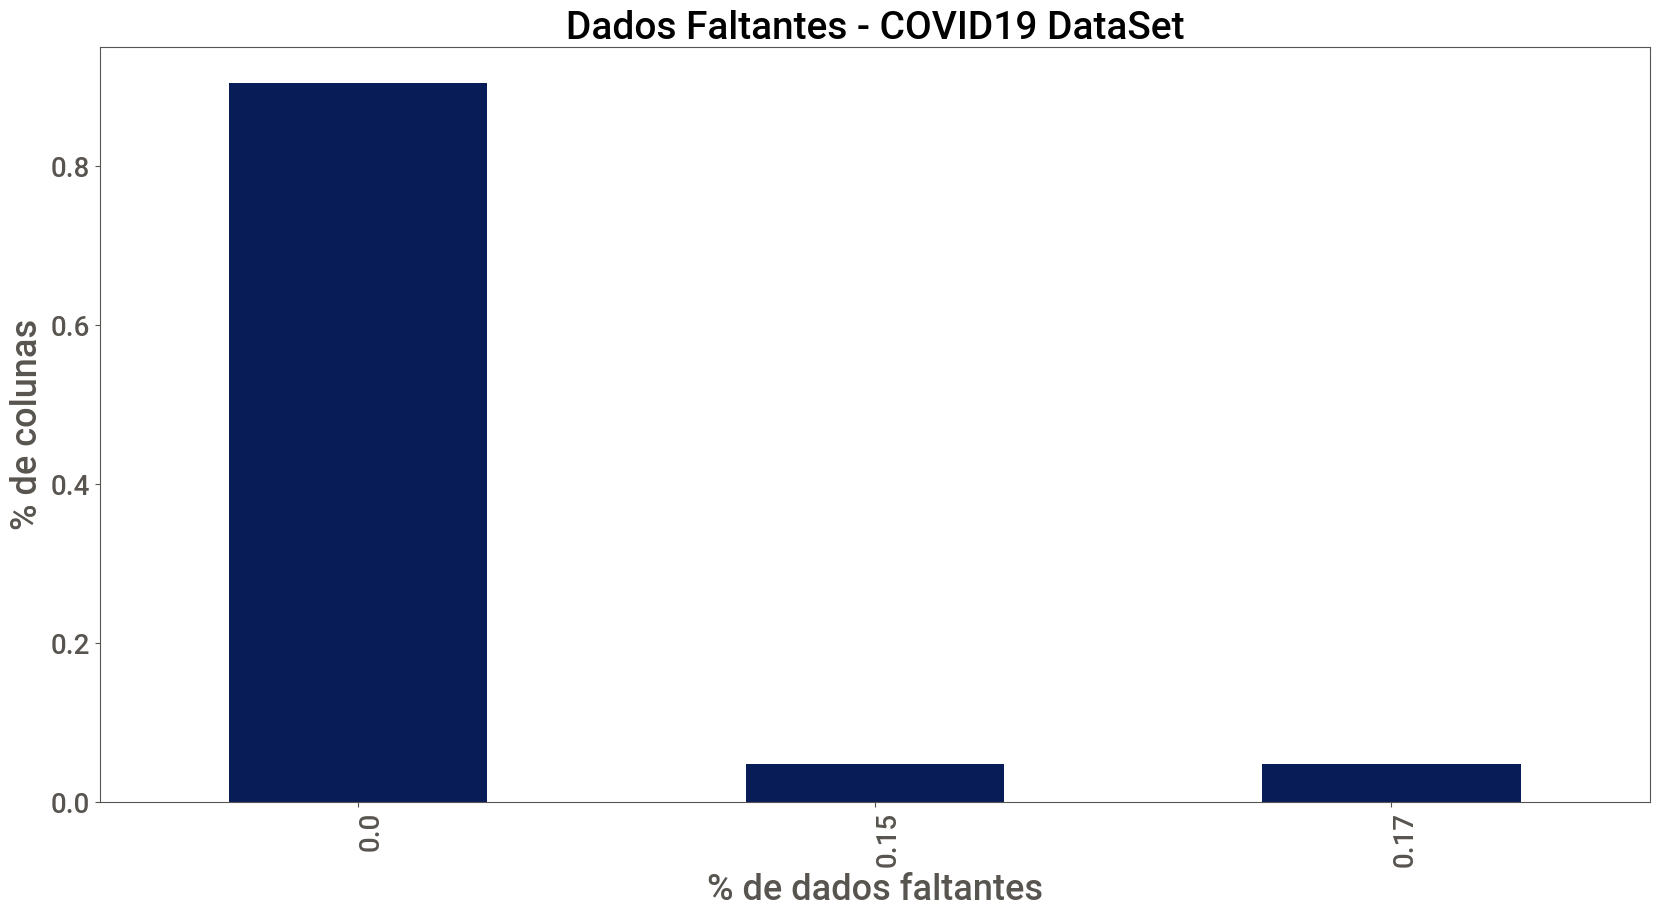

In [36]:
#Atualizar as informações sobre o dataset
informacao_df8 = EDA(df8)

gerar_graficos(informacao_df8);

In [37]:
df9 = df8.fillna(df8.median())

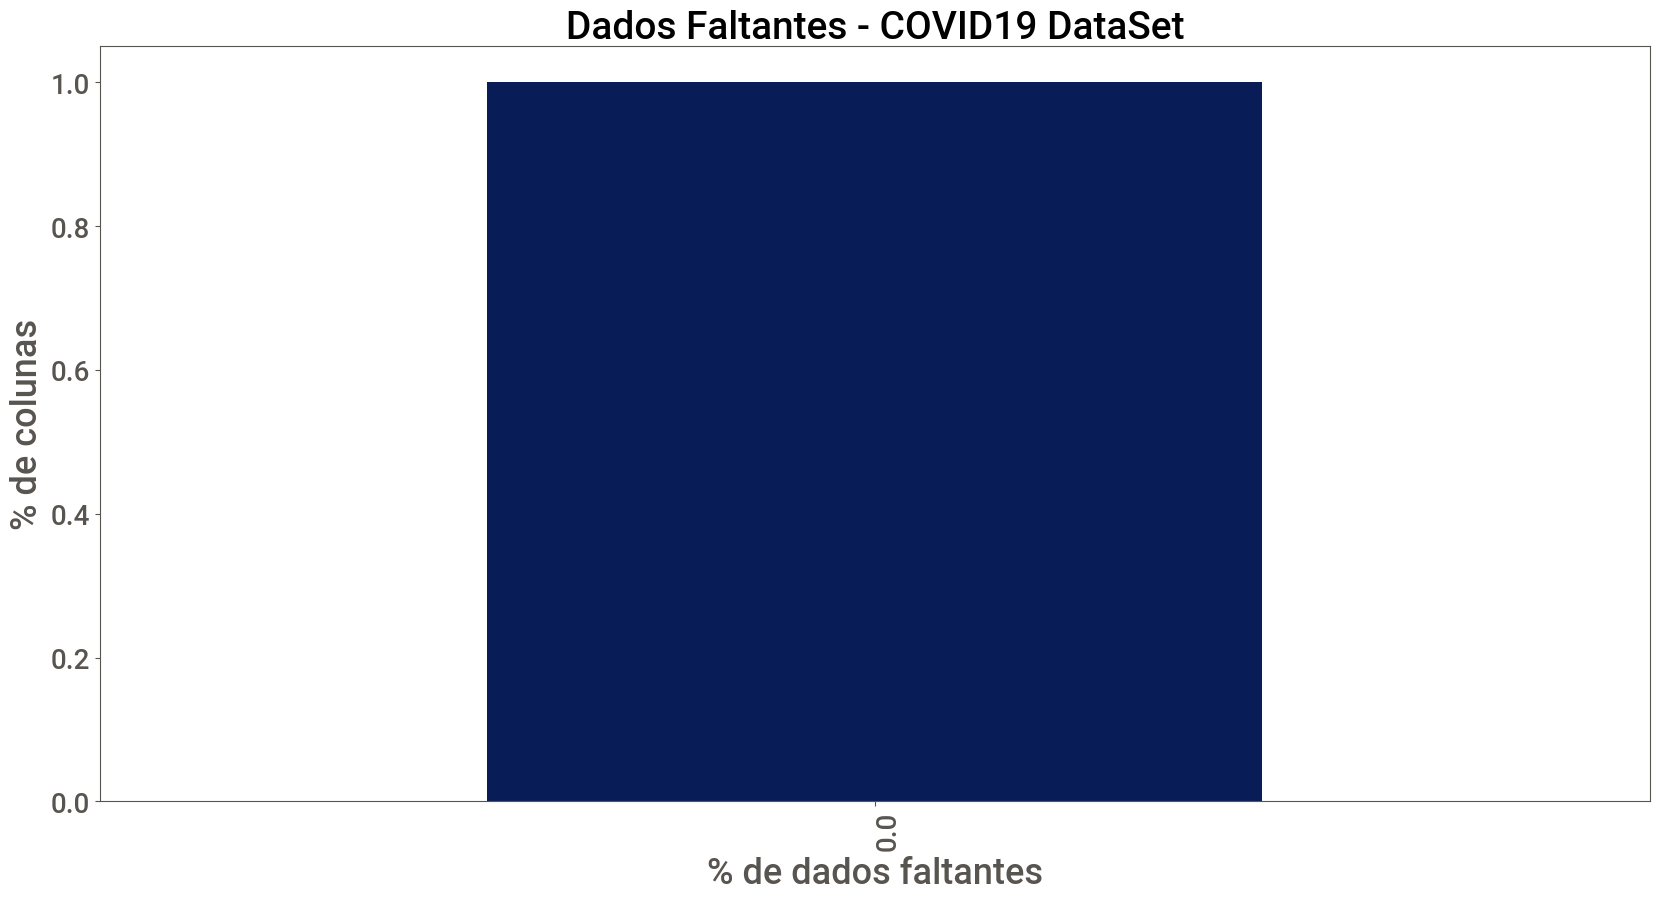

In [38]:
#Atualizar as informações sobre o dataset
informacao_df9 = EDA(df9)

gerar_graficos(informacao_df9);

In [39]:
informacao_df9

,Amount_NaN,%_NaN,DType,Amount_Data,Mean,Median,Max,Min,STD,Amount_Unique
basophils,0,0.0,float64,602,-0.00,-0.22,11.0782,-1.14014,1.00,17
eosinophils,0,0.0,float64,602,0.00,-0.33,8.35088,-0.835508,1.00,86
hematocrit,0,0.0,float64,602,-0.00,0.05,2.6627,-4.50142,1.00,176
hemoglobin,0,0.0,float64,602,-0.00,0.04,2.67187,-4.3456,1.00,84
leukocytes,0,0.0,float64,602,0.00,-0.21,4.52204,-2.0203,1.00,475
lymphocytes,0,0.0,float64,602,-0.00,-0.01,3.7641,-1.86507,1.00,318
mean corpuscular hemoglobin (mch),0,0.0,float64,602,-0.00,0.13,4.09855,-5.9376,1.00,91
mean corpuscular hemoglobin concentration (mchc),0,0.0,float64,602,0.00,-0.05,3.33107,-5.43181,1.00,57
mean corpuscular volume (mcv),0,0.0,float64,602,-0.00,0.07,3.41098,-5.10158,1.00,190
mean platelet volume,0,0.0,float64,602,-0.00,-0.10,3.71305,-2.45757,1.00,48


In [40]:
df9.head()

,patient age quantile,sars-cov-2 exam result,"patient addmited to regular ward (1=yes, 0=no)","patient addmited to semi-intensive unit (1=yes, 0=no)","patient addmited to intensive care unit (1=yes, 0=no)",hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,lymphocytes,mean corpuscular hemoglobin concentration (mchc),leukocytes,basophils,mean corpuscular hemoglobin (mch),eosinophils,mean corpuscular volume (mcv),monocytes,red blood cell distribution width (rdw),neutrophils,proteina c reativa mg/dl
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
15,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.880570,-0.393291
18,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
22,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.422410,-0.393291


In [41]:
df9.shape

(602, 21)

# Agora é com vocês! Implementando um algoritmo!

links com documentação: 

https://scikit-learn.org/stable/preface.html  
https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

### Now I want to take a look into the dataframe to have an idea of what I'm working with, I'll use sweetviz.

In [42]:
# https://pypi.org/project/sweetviz/

advert_report_2 = sv.analyze(df9, pairwise_analysis='off')

advert_report_2.show_html('final_table.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:10  -> (00:00 left)

Report final_table.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Starting with Naive Bayes to get the hang of it

I believe this is not the right algorith because it assumes the importance of the features is equal, and this is most likely false. But we need to start somewhere. I believe a decision tree will yield the best results, but I also want to try a logistic regression.

### Making my first model

In [44]:
df_base = df9
df_base.head()

,patient age quantile,sars-cov-2 exam result,"patient addmited to regular ward (1=yes, 0=no)","patient addmited to semi-intensive unit (1=yes, 0=no)","patient addmited to intensive care unit (1=yes, 0=no)",hematocrit,hemoglobin,platelets,mean platelet volume,red blood cells,lymphocytes,mean corpuscular hemoglobin concentration (mchc),leukocytes,basophils,mean corpuscular hemoglobin (mch),eosinophils,mean corpuscular volume (mcv),monocytes,red blood cell distribution width (rdw),neutrophils,proteina c reativa mg/dl
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.619086,-0.147895
8,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.127395,-0.286986
15,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0.880570,-0.393291
18,11,negative,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0.265957,-0.487674
22,9,negative,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,-0.422410,-0.393291


In [45]:
# Iterating the columns and printing them
for col in df_base.columns: 
    print(col)

patient age quantile
sars-cov-2 exam result
patient addmited to regular ward (1=yes, 0=no)
patient addmited to semi-intensive unit (1=yes, 0=no)
patient addmited to intensive care unit (1=yes, 0=no)
hematocrit
hemoglobin
platelets
mean platelet volume 
red blood cells
lymphocytes
mean corpuscular hemoglobin concentration (mchc)
leukocytes
basophils
mean corpuscular hemoglobin (mch)
eosinophils
mean corpuscular volume (mcv)
monocytes
red blood cell distribution width (rdw)
neutrophils
proteina c reativa mg/dl


In [46]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

X_train, X_test = train_test_split(df_base, test_size=0.3, random_state=2020)

#Create an instance of the function
gnb = GaussianNB()
# I don't know how to select all columns except for one so I'll do it the hard way
selected_col=['patient age quantile', 'patient addmited to regular ward (1=yes, 0=no)', 
              'patient addmited to semi-intensive unit (1=yes, 0=no)', 'patient addmited to intensive care unit (1=yes, 0=no)', 
              'hematocrit', 'hemoglobin', 'platelets', 'mean platelet volume ', 'red blood cells', 'lymphocytes',
              'mean corpuscular hemoglobin concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean corpuscular hemoglobin (mch)',
              'eosinophils', 'mean corpuscular volume (mcv)', 'monocytes', 'red blood cell distribution width (rdw)', 'neutrophils',
              'proteina c reativa mg/dl']

#Generates the model
gnb.fit(
    X_train[selected_col].values, X_train["sars-cov-2 exam result"]
)
#Applies model to X_test to generate predictions
prediction_test = gnb.predict(X_test[selected_col])
y_test = X_test["sars-cov-2 exam result"]

print("{} patients were mislabeled out of a total of {} patients. Accuracy: {:05.2f}%"
          .format(
              (prediction_test != y_test).sum(),
              X_test.shape[0],
              100*(1-(prediction_test != y_test)).sum()/X_test.shape[0])
      )

36 patients were mislabeled out of a total of 181 patients. Accuracy: 80.11%


It's funny that if I use 2015 as a seed instead of 2020 my accuracy gains 5% points. Which means randomness is playing a very big factor.

In [47]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

X_train, X_test = train_test_split(df_base, test_size=0.3, random_state=2015)

#Create an instance of the function
gnb = GaussianNB()
selected_col=['patient age quantile', 'patient addmited to regular ward (1=yes, 0=no)', 
              'patient addmited to semi-intensive unit (1=yes, 0=no)', 'patient addmited to intensive care unit (1=yes, 0=no)', 
              'hematocrit', 'hemoglobin', 'platelets', 'mean platelet volume ', 'red blood cells', 'lymphocytes',
              'mean corpuscular hemoglobin concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean corpuscular hemoglobin (mch)',
              'eosinophils', 'mean corpuscular volume (mcv)', 'monocytes', 'red blood cell distribution width (rdw)', 'neutrophils',
              'proteina c reativa mg/dl']

#Generates the model
gnb.fit(
    X_train[selected_col].values, X_train["sars-cov-2 exam result"]
)
#Applies model to X_test to generate predictions
prediction_test = gnb.predict(X_test[selected_col])
y_test = X_test["sars-cov-2 exam result"]

print("{} patients were mislabeled out of a total of {} patients. Accuracy: {:05.2f}%"
          .format(
              (prediction_test != y_test).sum(),
              X_test.shape[0],
              100*(1-(prediction_test != y_test)).sum()/X_test.shape[0])
      )

26 patients were mislabeled out of a total of 181 patients. Accuracy: 85.64%


### Second batch of models

!!!@#!43141234 Resolver: matriz de confusao ta zoada, usar normalize no lugar do metodo q to usando?

Now I'll try normalizing the results, I'll use the sklearn.preprocessing.MinMaxScaler function. I want to do the normalization after I split the data into test and train. This time I'll also add a confusion matrix to analize the prediction.

In [61]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
#I need to change NEGATIVE to 0 and POSITIVE to 1, otherwise the scalar won't work
df_base['sars-cov-2 exam result'] = df_base['sars-cov-2 exam result'].replace(['negative'], 0)
df_base['sars-cov-2 exam result'] = df_base['sars-cov-2 exam result'].replace(['positive'], 1)

X_train, X_test = train_test_split(df_base, test_size=0.3, random_state=2020)

# I don't know how to select all columns except for one so I'll do it the hard way
selected_col=['patient age quantile', 'patient addmited to regular ward (1=yes, 0=no)', 
              'patient addmited to semi-intensive unit (1=yes, 0=no)', 'patient addmited to intensive care unit (1=yes, 0=no)', 
              'hematocrit', 'hemoglobin', 'platelets', 'mean platelet volume ', 'red blood cells', 'lymphocytes',
              'mean corpuscular hemoglobin concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean corpuscular hemoglobin (mch)',
              'eosinophils', 'mean corpuscular volume (mcv)', 'monocytes', 'red blood cell distribution width (rdw)', 'neutrophils',
              'proteina c reativa mg/dl']

#Normalizing the data to -1, 1 intervals. This method returns an array not a DF. So I create a new dataframe. Notice that I normalize train and test idependently, to prevent dataleaks.
scaler = MinMaxScaler(feature_range = (-1,1))
X_train_norm = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)

#If I want to reverse this just use this: scaler.inverse_transform(scaled_data)

#Create an instance of the function
gnb = GaussianNB()

#Generates the model
gnb.fit(
    X_train_norm[selected_col].values, X_train_norm["sars-cov-2 exam result"]
)
#Applies model to X_test to generate predictions
prediction_test = gnb.predict(X_test_norm[selected_col])
y_test = X_test_norm["sars-cov-2 exam result"]

#Now I will add a confusion matrix. I made 3 versions so it becomes less confusing to me although it IS a confusion matrix.
print("\nConfusion Matrix \nPred:   No_COV COV\nT_No_COV [TN, FP]\nT_COV    [FN, TP]\n")
confusion_matrix = confusion_matrix(y_test, prediction_test)
print("Confusion Matrix \n{}\n".format(confusion_matrix))

confusion_matrix_pd = pd.crosstab(y_test, prediction_test)
print("Confusion Matrix \n{}\n".format(confusion_matrix_pd))

#Now I will use the confusion matrix to define TP, TN, FP, FN
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
print("TP = {}, TN = {}, FP = {}, FN = {}.\n".format(TP, TN, FP, FN))

#Accuracy ou Acurácia = (TP + TN)/(TP + TN + FP + FN)
print("{} patients were labeled correctly out of a total of {} patients. Accuracy: {:05.2f}%"
          .format(
              TP + TN,
              TP + TN + FP + FN,
              100*(TP + TN)/(TP + TN + FP + FN)
              )
      )
#Precision ou Precisão = TP / (TP + FP)
print("{} patients were correctly labeled as having COVID out of {} patients that were predicted to have COVID. Precision: {:05.2f}%"
          .format(
              TP,
              TP + FP,
              100*(TP)/(TP + FP)
              )
      )
#Recall ou Revocação = TP / (TP + FN)
print("{} patients were correctly labeled as having COVID of the total of {} that had COVID. Recall: {:05.2f}%"
          .format(
              TP,
              TP + FN,
              100*(TP)/(TP + FN)
              )
      )
#Score F1 = 2 * ( (precision * recall)/(precision + recall) )
precision = (TP)/(TP + FP)
recall = (TP)/(TP + FN)
F1 = 2 * ( (precision * recall)/(precision + recall) )
print("Precision was {}, recall was {}. Score F1: {:05.2f}"
          .format(
              precision,
              recall,
              F1
              )
      )


Confusion Matrix 
Pred:   No_COV COV
T_No_COV [TN, FP]
T_COV    [FN, TP]

Confusion Matrix 
[[155   1]
 [ 22   3]]

Confusion Matrix 
col_0                   -1.0   1.0
sars-cov-2 exam result            
-1.0                     155     1
 1.0                      22     3

TP = 3, TN = 155, FP = 1, FN = 22.

158 patients were labeled correctly out of a total of 181 patients. Accuracy: 87.29%
3 patients were correctly labeled as having COVID out of 4 patients that were predicted to have COVID. Precision: 75.00%
3 patients were correctly labeled as having COVID of the total of 25 that had COVID. Recall: 12.00%
Precision was 0.75, recall was 0.12. Score F1: 00.21


In [ ]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#I need to change NEGATIVE to 0 and POSITIVE to 1, otherwise the scalar won't work
df_base['sars-cov-2 exam result'] = df_base['sars-cov-2 exam result'].replace(['negative'], 0)
df_base['sars-cov-2 exam result'] = df_base['sars-cov-2 exam result'].replace(['positive'], 1)

X_train, X_test = train_test_split(df_base, test_size=0.3, random_state=2015)

# I don't know how to select all columns except for one so I'll do it the hard way
selected_col=['patient age quantile', 'patient addmited to regular ward (1=yes, 0=no)', 
              'patient addmited to semi-intensive unit (1=yes, 0=no)', 'patient addmited to intensive care unit (1=yes, 0=no)', 
              'hematocrit', 'hemoglobin', 'platelets', 'mean platelet volume ', 'red blood cells', 'lymphocytes',
              'mean corpuscular hemoglobin concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean corpuscular hemoglobin (mch)',
              'eosinophils', 'mean corpuscular volume (mcv)', 'monocytes', 'red blood cell distribution width (rdw)', 'neutrophils',
              'proteina c reativa mg/dl']

#Normalizing the data to -1, 1 intervals. This method returns an array not a DF. So I create a new dataframe. Notice that I normalize train and test idependently, to prevent dataleaks.
scaler = MinMaxScaler(feature_range = (-1,1))
X_train_norm = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(data=scaler.fit_transform(X_test), columns=X_test.columns)

#If I want to reverse this just use this: scaler.inverse_transform(scaled_data)

#Create an instance of the function
gnb = GaussianNB()

#Generates the model
gnb.fit(
    X_train_norm[selected_col].values, X_train_norm["sars-cov-2 exam result"]
)
#Applies model to X_test to generate predictions
prediction_test = gnb.predict(X_test_norm[selected_col])
y_test = X_test_norm["sars-cov-2 exam result"]

print("{} patients were mislabeled out of a total of {} patients. Accuracy: {:05.2f}%"
          .format(
              (prediction_test != y_test).sum(),
              X_test_norm.shape[0],
              100*(1-(prediction_test != y_test)).sum()/X_test_norm.shape[0])
      )

22 patients were mislabeled out of a total of 181 patients. Accuracy: 87.85%


Now the difference between the seed 2020 and 2015 is of just 0.35%, which means normalizing helped diminish the impact of choosing different test, train sets. Useful information to apply in the next batch.

## Trying decision trees

### Slicing the data into five parts

df_base is the dataframe's name.

We need to split the data into train and test sets. We will also make a X, Y division in the data. X are the columns used to make the prediction. Y is the target, in this case the sars-cov-2 exam result. We want train_x, train_y and test_x, test_y to use this algo.

I want to make rotational train/test samples, will use five of them.

### Coisas extras pra testar: brincar com o range q ele decide se é verdadeiro ou falso, brincar com o tirar variaveis q o modelo da pouca importancia

# Muito mais importante do que implementar o algoritmo é saber analisar os resultados. Devo implementar dois algos, e fazer uma analise comparativa. Focar em conceitos e em reflexões. Deixar claro a minha interpretação dos dados e dos algoritmos é muito importante.

In [ ]:
print(df9.columns)

Index(['patient age quantile', 'sars-cov-2 exam result',
       'patient addmited to regular ward (1=yes, 0=no)',
       'patient addmited to semi-intensive unit (1=yes, 0=no)',
       'patient addmited to intensive care unit (1=yes, 0=no)', 'hematocrit',
       'hemoglobin', 'platelets', 'mean platelet volume ', 'red blood cells',
       'lymphocytes', 'mean corpuscular hemoglobin concentration (mchc)',
       'leukocytes', 'basophils', 'mean corpuscular hemoglobin (mch)',
       'eosinophils', 'mean corpuscular volume (mcv)', 'monocytes',
       'red blood cell distribution width (rdw)', 'neutrophils',
       'proteina c reativa mg/dl'],
      dtype='object')


In [ ]:
!pip install sklearn
!pip install sklearn.cross_validation

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function to split the dataset 
def splitdataset(data):

    # Separating the target variable
    X = data.values[:, 1:5]
    Y = data.values[:, 0]

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2020)
 
    return X, Y, X_train, X_test, y_train, y_test

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)

    return clf_gini
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(X_train, y_train)

    return clf_entropy

# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 

    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", classification_report(y_test, y_pred)) 

# Driver code 
# Building Phase 
data = df9
X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
# Operational Phase
# Prediction using gini 
print("Results Using Gini Index:") 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini)

# Prediction using entropy 
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


ValueError: ignored